 To crossmatch two catalogues we need to compare the angular distance between objects on the celestial sphere.

People loosely call this a "distance", but technically its an angular distance: the projected angle between objects as seen from Earth.

If we have an object on the celestial sphere with right ascension and declination (α1,δ1), then the angular distance to another object with coordinates (α2,δ2) is:

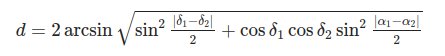

Angular distances have the same units as angles (degrees). There are [other equations](https://en.wikipedia.org/wiki/Great-circle_distance#Formulas) for calculating the angular distance but this one, called the [haversine formula](https://en.wikipedia.org/wiki/Haversine_formula), is good at avoiding floating point errors when the two points are close together. 


 We'll go through an example of how to implement the formula you saw on the previous slide using NumPy's trigonometric functions. Please keep in mind that NumPy trigonometric functions only take radians as input so you need to convert your coordinates when needed.

First, let's break down the formula into smaller parts: 

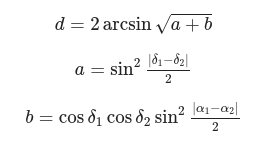


We can calculate b with NumPy's sin, cos and abs functions:

`b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2`

Here, r1 and d1 are the coordinates of the first point (α1,δ1) and r2 and d2 similarly correspond to α2 and δ2.

a can be calculated in a similar way using just sin and abs. Once we have both a and b we can use numpy.arcsin to calculate d:

`d = 2*np.arcsin(np.sqrt(a + b))`


> **Note**
> 
> Trig functions in most languages and libraries (including Python and NumPy) take angle arguments in units of radians, but the databases we're working with use angles of degrees.
> 
> Fortunately, NumPy provides convenient conversion functions:
> 
> `a_rad = np.radians(a_deg)`
> 
> `a_deg = np.degrees(a_rad)`
> 
> The variable a_deg is in units of degrees and a_rad is in radians.


Write a function called angular_dist that calculates the angular distance between any two points on the celestial sphere given their right ascension and declination.

Your function should take arguments in decimal degrees and return the distance in decimal degrees too.

Here's an example of how your function should work:

In [4]:
import numpy as np

def angular_dist(radius1, declination1, radius2, declination2):

    # convert to radians
    radius1 = np.radians(radius1)
    declination1 = np.radians(declination1)
    radius2 = np.radians(radius2)
    declination2 = np.radians(declination2)
    
    # calc a
    a = np.sin(np.abs(declination1 - declination2)/ 2)**2 

    # calc b
    b = np.cos(declination1)*np.cos(declination2)*np.sin(np.abs(radius1 - radius2)/2)**2

    # calc d
    d = 2*np.arcsin(np.sqrt(a + b))

    # convert to degrees
    d = np.degrees(d)

    return d

In [5]:
if __name__ == '__main__':
  # Run your function with the first example in the question.
  print(angular_dist(21.07, 0.1, 21.15, 8.2))

  # Run your function with the second example in the question
  print(angular_dist(10.3, -3, 24.3, -29))


8.100392318146504
29.208498180546595
